# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [2]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import torch as t
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

diabets_df = pd.read_csv("./diabetes.csv", sep=",")
diabets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4303 non-null   int64  
 1   Gender          4303 non-null   int64  
 2   BMI             4303 non-null   float64
 3   SBP             4303 non-null   int64  
 4   DBP             4303 non-null   int64  
 5   FPG             4303 non-null   float64
 6   Chol            4303 non-null   float64
 7   Tri             4303 non-null   float64
 8   HDL             4303 non-null   float64
 9   LDL             4303 non-null   float64
 10  ALT             4303 non-null   float64
 11  BUN             4303 non-null   float64
 12  CCR             4303 non-null   float64
 13  FFPG            4303 non-null   float64
 14  smoking         4303 non-null   float64
 15  drinking        4303 non-null   float64
 16  family_histroy  4303 non-null   int64  
 17  Diabetes        4303 non-null   i

In [11]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions))

def visualize(model, X_train, y_train, X_test, y_test):
    train_errors = []
    test_errors = []

    for y_train_pred, y_test_pred in zip(model.staged_predict(X_train), model.staged_predict(X_test)):
        train_error = 1 - accuracy_score(y_train, y_train_pred)
        train_errors.append(train_error)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        test_errors.append(test_error)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_errors) + 1), train_errors, label='Trained Error')
    plt.plot(range(1, len(test_errors) + 1), test_errors, label='Test Error')
    plt.xlabel('Iterations count')
    plt.ylabel('Error')
    plt.title('Error for count of iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

def grid_search_parameter(model, param_grid, cv, scoring, verbose, X_train, y_train):
    grid_search_model = GridSearchCV(model, param_grid, cv=cv, scoring=scoring, verbose=verbose)
    grid_search_model.fit(X_train, y_train)
    return grid_search_model

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.95      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.95      0.91      0.93       861
weighted avg       0.94      0.94      0.94       861



c:\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


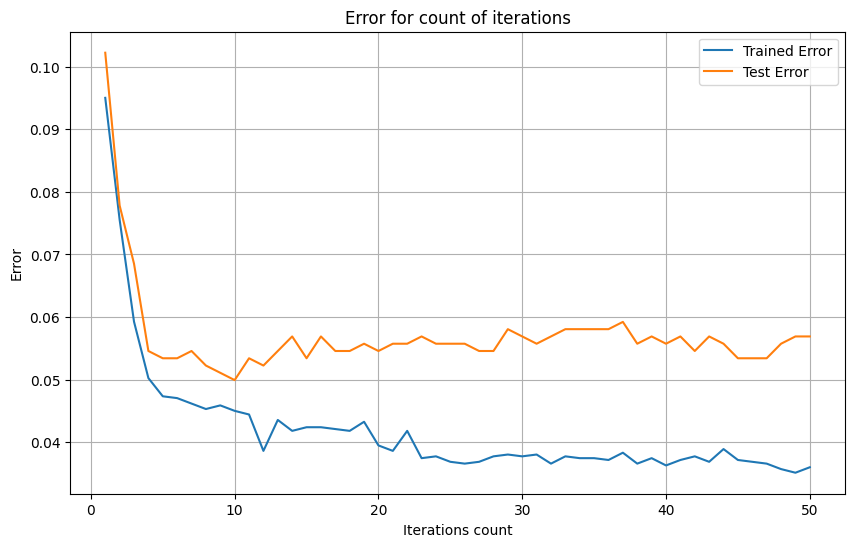

In [4]:
X = diabets_df.drop(columns=['Diabetes'])
y = diabets_df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    algorithm="SAMME.R",
    learning_rate=1
)
train_and_evaluate_model(ada_clf, X_train, y_train, X_test, y_test)
visualize(ada_clf, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       624
           1       0.95      0.84      0.89       237

    accuracy                           0.94       861
   macro avg       0.95      0.91      0.93       861
weighted avg       0.94      0.94      0.94       861



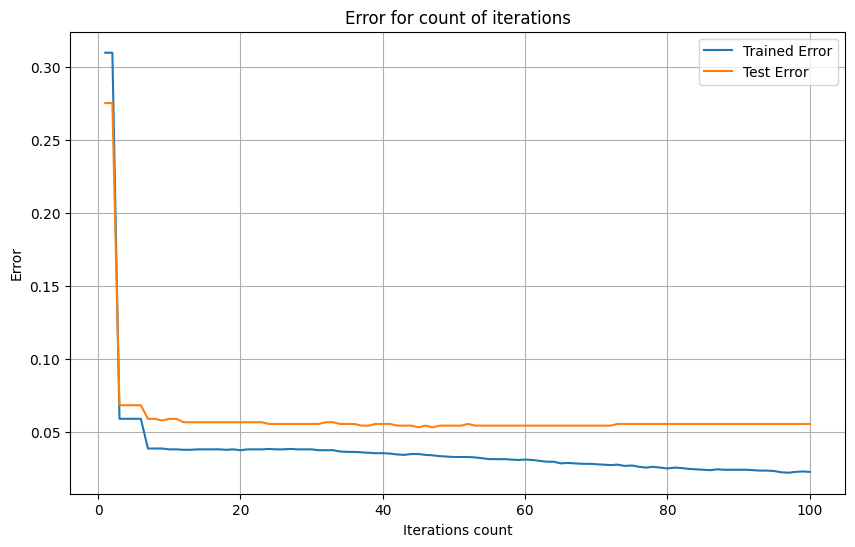

In [5]:
grad_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
train_and_evaluate_model(grad_clf, X_train, y_train, X_test, y_test)
visualize(grad_clf, X_train, y_train, X_test, y_test)

[0]	validation_0-logloss:0.54136	validation_1-logloss:0.52426
[1]	validation_0-logloss:0.48104	validation_1-logloss:0.47079
[2]	validation_0-logloss:0.43232	validation_1-logloss:0.42774
[3]	validation_0-logloss:0.39189	validation_1-logloss:0.39210
[4]	validation_0-logloss:0.35791	validation_1-logloss:0.36204
[5]	validation_0-logloss:0.32901	validation_1-logloss:0.33581
[6]	validation_0-logloss:0.30409	validation_1-logloss:0.31313
[7]	validation_0-logloss:0.28258	validation_1-logloss:0.29447
[8]	validation_0-logloss:0.26381	validation_1-logloss:0.27748
[9]	validation_0-logloss:0.24740	validation_1-logloss:0.26260
[10]	validation_0-logloss:0.23295	validation_1-logloss:0.25059
[11]	validation_0-logloss:0.22016	validation_1-logloss:0.23989
[12]	validation_0-logloss:0.20791	validation_1-logloss:0.22974
[13]	validation_0-logloss:0.19777	validation_1-logloss:0.22123
[14]	validation_0-logloss:0.18857	validation_1-logloss:0.21447
[15]	validation_0-logloss:0.17976	validation_1-logloss:0.20746
[1

C:\Users\Користувач\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [22:47:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[78]	validation_0-logloss:0.08285	validation_1-logloss:0.15406
[79]	validation_0-logloss:0.08244	validation_1-logloss:0.15394
[80]	validation_0-logloss:0.08228	validation_1-logloss:0.15421
[81]	validation_0-logloss:0.08212	validation_1-logloss:0.15422
[82]	validation_0-logloss:0.08137	validation_1-logloss:0.15428
[83]	validation_0-logloss:0.08102	validation_1-logloss:0.15431
[84]	validation_0-logloss:0.08071	validation_1-logloss:0.15459
[85]	validation_0-logloss:0.08016	validation_1-logloss:0.15465
[86]	validation_0-logloss:0.07991	validation_1-logloss:0.15466
[87]	validation_0-logloss:0.07961	validation_1-logloss:0.15468
[88]	validation_0-logloss:0.07932	validation_1-logloss:0.15450
[89]	validation_0-logloss:0.07906	validation_1-logloss:0.15461
[90]	validation_0-logloss:0.07875	validation_1-logloss:0.15476
[91]	validation_0-logloss:0.07861	validation_1-logloss:0.15480
[92]	validation_0-logloss:0.07835	validation_1-logloss:0.15488
[93]	validation_0-logloss:0.07778	validation_1-logloss:

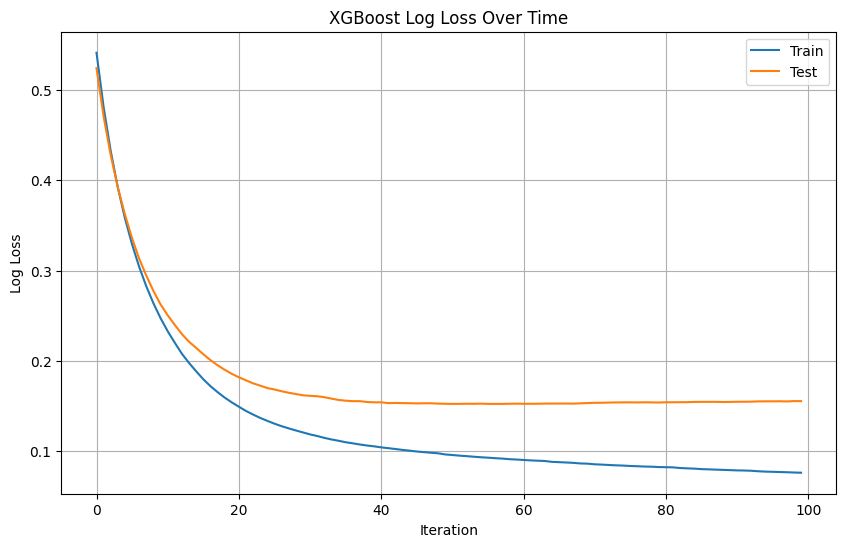

Accuracy: 0.9431


In [6]:

xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='logloss'
)

eval_set = [(X_train, y_train), (X_test, y_test)]

xgb_clf.fit(
    X_train, y_train,
    eval_set=eval_set,  
    verbose=True  
)

evals_result = xgb_clf.evals_result()

epochs = len(evals_result['validation_0']['logloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, evals_result['validation_0']['logloss'], label='Train')
plt.plot(x_axis, evals_result['validation_1']['logloss'], label='Test')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss Over Time')
plt.legend()
plt.grid(True)
plt.show()

y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

In [7]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

ada_clf = grid_search_parameter(ada_clf, param_grid, 5, 'accuracy', 1, X_train, y_train)
print('ada_clf_without_reg best_params_', ada_clf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
ada_clf_without_reg best_params_ {'learning_rate': 0.1, 'n_estimators': 100}


In [12]:
param_grid = {
    'n_estimators': [100, 200],  
    'learning_rate': [0.1, 0.2], 
    'max_depth': [3, 5],  
    'subsample': [0.8, 1.0],  
    'min_samples_split': [5],  
    'min_samples_leaf': [1, 2]  
}

grad_clf_without_reg = grid_search_parameter(grad_clf, param_grid, 5, 'accuracy', 1, X_train, y_train)
print('grad_clf_without_reg best_params_', grad_clf_without_reg.best_params_)
evaluate_model(grad_clf_without_reg, X_test, y_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
grad_clf_without_reg best_params_ {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.9443
Precision: 0.9439
Recall: 0.9443
F1 Score: 0.9435


{'accuracy': 0.9442508710801394,
 'precision': 0.9438935620586888,
 'recall': 0.9442508710801394,
 'f1': 0.9435468801468473}

In [13]:
param_grid_xgb = {
    'n_estimators': [100, 200],  
    'learning_rate': [0.1, 0.2], 
    'max_depth': [3, 5],  
    'subsample': [0.8, 1.0],  
    'min_samples_split': [5],  
    'min_samples_leaf': [1, 2],
}

xgb_clf_without_reg = grid_search_parameter(xgb_clf, param_grid_xgb, 5, 'accuracy', 1, X_train, y_train)
print('xgb_clf_without_reg best_params_', xgb_clf_without_reg.best_params_)
evaluate_model(xgb_clf_without_reg, X_test, y_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\Користувач\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [23:21:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Користувач\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [23:21:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Користувач\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [23:21:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-wind

xgb_clf_without_reg best_params_ {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.9443
Precision: 0.9441
Recall: 0.9443
F1 Score: 0.9434


C:\Users\Користувач\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [23:21:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'accuracy': 0.9442508710801394,
 'precision': 0.9440902646994852,
 'recall': 0.9442508710801394,
 'f1': 0.9433770109623412}

In [14]:
param_grid_grad = {
    'n_estimators': [100, 200],  
    'learning_rate': [0.1, 0.2], 
    'max_depth': [3, 5],  
    'subsample': [0.8, 1.0],  
    'min_samples_split': [5],  
    'min_samples_leaf': [1, 2],
    'min_weight_fraction_leaf': [0.0, 0.1] 
}

grid_grad_with_reg = grid_search_parameter(grad_clf, param_grid_grad, 5, 'accuracy', 1, X_train, y_train)
print('grid_ada_with_reg.best_params_', grid_grad_with_reg.best_params_)
evaluate_model(grid_grad_with_reg, X_test, y_test)  

Fitting 5 folds for each of 64 candidates, totalling 320 fits
grid_ada_with_reg.best_params_ {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.9443
Precision: 0.9439
Recall: 0.9443
F1 Score: 0.9435


{'accuracy': 0.9442508710801394,
 'precision': 0.9438935620586888,
 'recall': 0.9442508710801394,
 'f1': 0.9435468801468473}

In [15]:
param_grid_xgb = {
    'n_estimators': [100, 200],  
    'learning_rate': [0.1, 0.2], 
    'max_depth': [3, 5],  
    'subsample': [0.8, 1.0],  
    'min_samples_split': [5],  
    'min_samples_leaf': [1, 2],
    'alpha': [0, 0.1, 1],  
    'lambda': [1, 10]  
}

grid_xgb_with_reg = grid_search_parameter(xgb_clf, param_grid_xgb, 5, 'accuracy', 1, X_train, y_train)
print('grid_xgb_with_reg.best_params_', grid_xgb_with_reg.best_params_)
evaluate_model(grid_xgb_with_reg, X_test, y_test)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


C:\Users\Користувач\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [23:32:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Користувач\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [23:32:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Користувач\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [23:32:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-wind

grid_xgb_with_reg.best_params_ {'alpha': 1, 'lambda': 10, 'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.9431
Precision: 0.9431
Recall: 0.9431
F1 Score: 0.9421


C:\Users\Користувач\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [23:34:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'accuracy': 0.943089430894309,
 'precision': 0.9431012489035842,
 'recall': 0.943089430894309,
 'f1': 0.9420638842719138}

Щодо порівняння моделей, то усі моделі справилися добре. Grid search практично не поліпшив результату, щодо регуляризації, вона теж ніяк не вплинула я виводив результати моделей до використання регуляризації і після і результати в усіх трьох моделей +- однакові 0.94 - 0.95 accuracy, precision і інші метрики оцінювання.

На превеликий, жаль регуляризація не допомогла у жодній моделі, але добре, що хоч не погіршила результат :)

Для кращого результату я б зменшив кількість параметрів і час знаходження для grid_search спрацьовував би набагато швидше, а результат скоріш за все не погіршився б. Такий висновок можна зробити із ada_clf там задано менше параметрів ніж у gradient_boosting та xbg_boosting